# Kinematic analysis

## What libraries should I import?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Recap
Dummy data for the following exercises is provided [here](https://ruhr-uni-bochum.sciebo.de/s/Svwxncw01Ir9uxw).

In [2]:
file = '/Users/guillermo/Downloads/pose-3d.csv'
data = pd.read_csv(file, header=0)
coords = data.loc[:, ~data.columns.str.contains(
    'score|error|ncams|fnum|center|M_')]


## Position in space

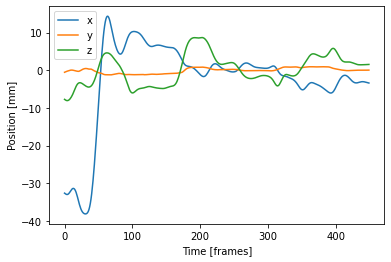

In [3]:
position_x = coords['nose1_x']
position_y = coords['nose1_y']
position_z = coords['nose1_z']

pos_x, = plt.plot(position_x, label='x')
pos_y, = plt.plot(position_y, label='y')
pos_z, = plt.plot(position_z, label='z')
plt.xlabel('Time [frames]')
plt.ylabel('Position [mm]')
plt.legend()


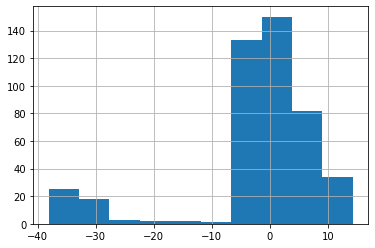

In [4]:
position_x.hist()


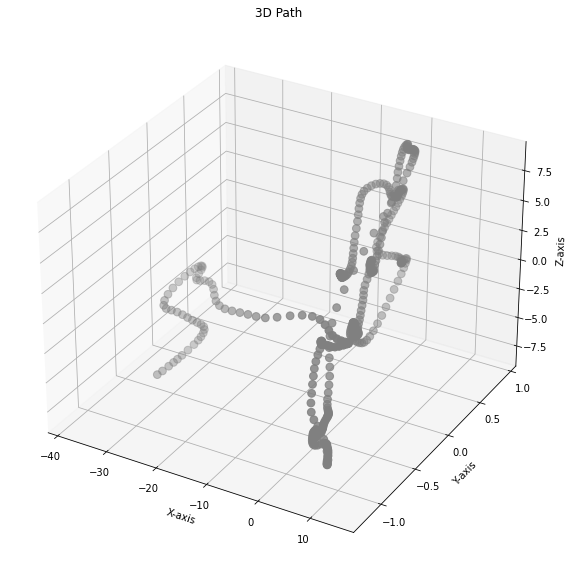

In [5]:
x = coords['nose1_x']
y = coords['nose1_y']
z = coords['nose1_z']

# creating 3d figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# creating the path map
img = ax.scatter(x, y, z, marker='o', s=60, color='gray')

# adding title and labels
ax.set_title("3D Path")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# displaying plot
plt.show()


## Velocity as difference between positions

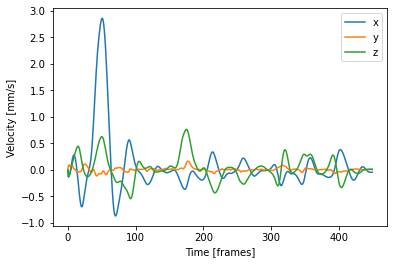

In [6]:
velocity_x = np.append([0], np.diff(position_x, n=1))
velocity_y = np.append([0], np.diff(position_y, n=1))
velocity_z = np.append([0], np.diff(position_z, n=1))

vel_x, = plt.plot(velocity_x, label='x')
vel_y, = plt.plot(velocity_y, label='y')
vel_z, = plt.plot(velocity_z, label='z')
plt.xlabel('Time [frames]')
plt.ylabel('Velocity [mm/s]')
plt.legend()


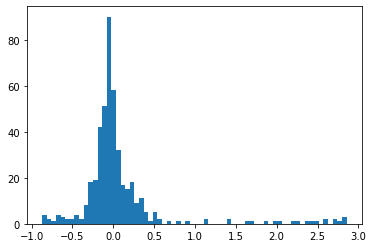

In [7]:
_ = plt.hist(velocity_x, bins='auto')


## Acceleration as difference in velocity

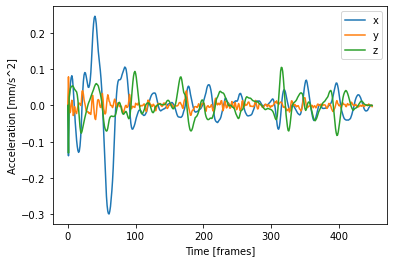

In [8]:
# Acceleration of head movement as frame-to-frame difference in velocity
acceleration_x = np.append([0], np.diff(velocity_x, n=1))
acceleration_y = np.append([0], np.diff(velocity_y, n=1))
acceleration_z = np.append([0], np.diff(velocity_z, n=1))

acc_x, = plt.plot(acceleration_x, label='x')
acc_y, = plt.plot(acceleration_y, label='y')
acc_z, = plt.plot(acceleration_z, label='z')
plt.xlabel('Time [frames]')
plt.ylabel('Acceleration [mm/s^2]')
plt.legend()


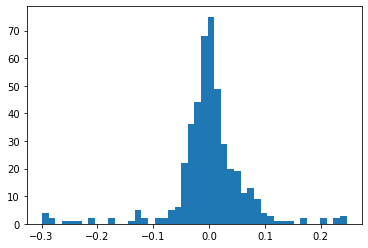

In [9]:
_ = plt.hist(acceleration_x, bins='auto')


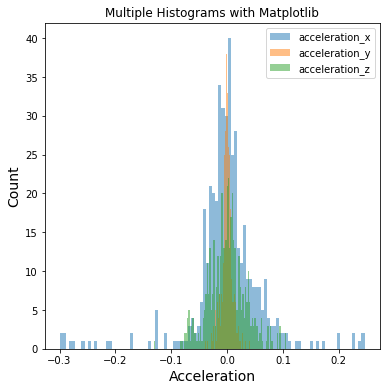

In [10]:
plt.figure(figsize=(6, 6))
plt.hist(acceleration_x, bins=100, alpha=0.5, label="acceleration_x")
plt.hist(acceleration_y, bins=100, alpha=0.5, label="acceleration_y")
plt.hist(acceleration_z, bins=100, alpha=0.5, label="acceleration_z")
plt.xlabel("Acceleration", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')


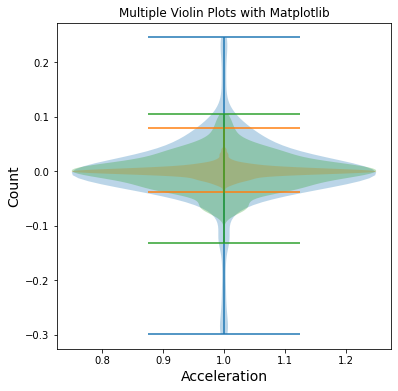

In [11]:
# Grouped plots
_ = plt.figure(figsize=(6, 6))
plt.violinplot(acceleration_x)
plt.violinplot(acceleration_y)
plt.violinplot(acceleration_z)
plt.xlabel("Acceleration", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Violin Plots with Matplotlib")


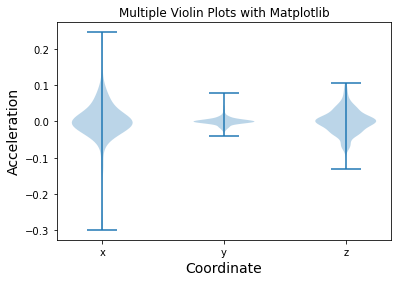

In [12]:
# Combine data
combined_acc = list([acceleration_x, acceleration_y, acceleration_z])

fig, ax = plt.subplots()

xticklabels = ['x', 'y', 'z']
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(xticklabels)
ax.violinplot(combined_acc)

plt.xlabel("Coordinate", size=14)
plt.ylabel("Acceleration", size=14)
plt.title("Multiple Violin Plots with Matplotlib")


In the following section we will learn to cluster our data using some very basic machine learning techniques.